Correlation between cpi and retail is 0.8057516265641875


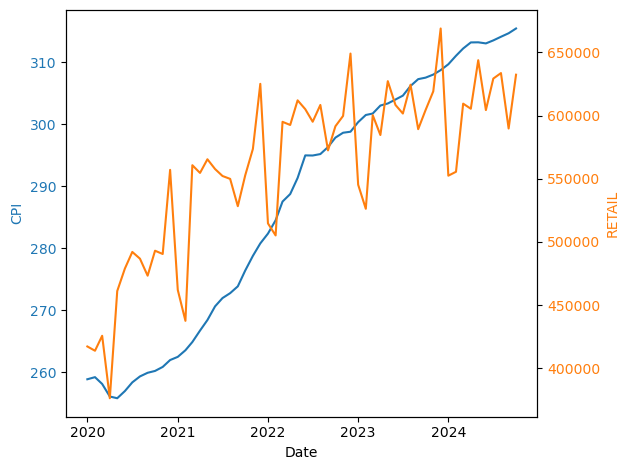

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cpi = pd.read_csv(f'C:/Users/YoungKwon/Downloads/hg/CPIAUCSL.csv') #,index_col = 'observation_date')
# ffr = pd.read_csv(f'C:/Users/YoungKwon/Downloads/hg/DFF.csv') //,index_col = 'observation_date')
ret = pd.read_csv(f'C:/Users/YoungKwon/Downloads/hg/MRTSSM44000USN.csv') #,index_col = 'observation_date')
cpi.head()
df = pd.merge(cpi, ret, on='observation_date', how='inner')
df['observation_date'] = pd.to_datetime(df['observation_date'])

ei = ['cpi','retail']
df.rename(columns={'observation_date':'date','CPIAUCSL':ei[0],'MRTSSM44000USN':ei[1]},inplace=True)

df = df[df['date'].dt.year >= 2020]
t = df['date']

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel(ei[0].upper(), color=color)
ax1.plot(t, df[ei[0]], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel(ei[1].upper(), color=color)
ax2.plot(t, df[ei[1]], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
# print(df.corr(method='pearson'))
print('Correlation between {0} and {1} is {2}'.format(ei[0],ei[1],df[ei[0]].corr(df[ei[1]],method='pearson')))
plt.show()

Correlation between cpi and fed funds rate is -0.2790900578695467


C:\Users\YoungKwon\AppData\Local\Temp\ipykernel_4764\2553978828.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = dff.resample('M').mean()


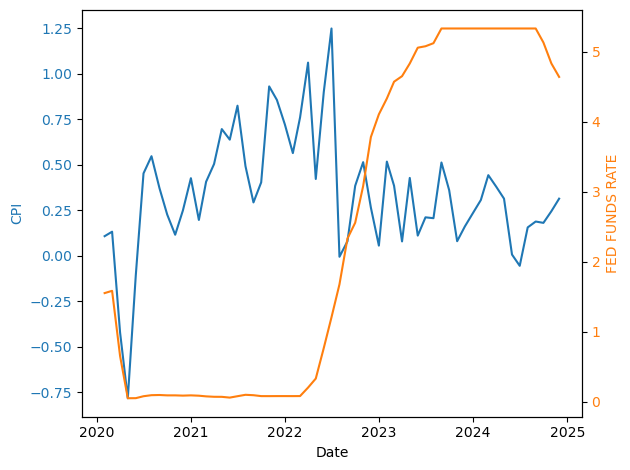

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

cpi = pd.read_csv(f'C:/Users/YoungKwon/Downloads/hg/CPIAUCSL.csv') #,index_col = 'observation_date')
dff = pd.read_csv(f'C:/Users/YoungKwon/Downloads/hg/DFF.csv') #,index_col = 'observation_date')


cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])+MonthEnd(0)
cpi.set_index('observation_date',inplace=True)#,drop=False)
cpi['cpi'] = cpi['CPIAUCSL'].pct_change()*100
cpi = cpi.drop('CPIAUCSL',axis=1)
cpi.reset_index(inplace=True)
cpi.tail()

dff['observation_date'] = pd.to_datetime(dff['observation_date']) #+MonthEnd(0)
dff.set_index('observation_date',inplace=True) #,drop=False)

monthly_avg = dff.resample('M').mean()
dff.rename(columns={'observation_date':'date'},inplace=True)
monthly_avg.reset_index(inplace=True)
dff = monthly_avg
dff.rename(columns={'DFF':'ffr'},inplace=True)
# dff.tail()

df = pd.merge(cpi, dff, on='observation_date', how='inner')


ei = ['cpi','fed funds rate']
df.rename(columns={'observation_date':'date','cpi':ei[0],'ffr':ei[1]},inplace=True)

# df.head(15)
df = df[df['date'].dt.year >= 2020]
t = df['date']

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel(ei[0].upper(), color=color)
ax1.plot(t, df[ei[0]], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:orange'
ax2.set_ylabel(ei[1].upper(), color=color)
ax2.plot(t, df[ei[1]], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
# print(df.corr(method='pearson'))
print('Correlation between {0} and {1} is {2}'.format(ei[0],ei[1],df[ei[0]].corr(df[ei[1]],method='pearson')))
plt.show()